In [1]:
# DSC 530
# Week 12
# Term Project
# Author: Nathanael Ochoa
# 03/02/2024

# DSC530 Term Project

# Is There an Actual Correlation Between House Features and Pricing?

I thought it would be interesting to use housing data and find out if house features does indeed justify house pricing. I found the dataset on [Kaggle](https://www.kaggle.com/) and the dataset, [USA Real Estate Dataset](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset) contains 10 variables.  I will be using the following variables in my analysis: **bed**, **bath**, **acre_lot**, **city**, **state**, **house_size**, and **price**.

I will remove any rows that have the value of 'ready_to_build' in the **status** column since these rows do no have any input under the necessary columns (i.e. under the **bed** and **bath** columns). I will also remove rows that contain any null values. 

Note that the dataset only contains housing data from the following US states/regions: Puerto Rico, Virgin Islands, Massachusetts, Connecticut, New Jersey, New York, New Hampshire, Vermont, Rhode Island, Wyoming, Maine, Pennsylvania, West Virginia, and Delaware.

I will also be using the scenario that I've been hired as a remote data engineer. I'm finally working my dream job and I'd like to take advantage of working remotely and move to a different state. I threw a dart on a board and got Delaware. I'm limiting the data to just one state/region (Delaware) due to the fact that the dataset is too large and it makes it difficult to plot the required project graphs. They're not visibile due to the sheer size of all of the data and it's proven difficult to pinpoint the height of the graphs.

## Variable Descriptions

* **bed** is the number of bedrooms.
* **bath** is the number of bathrooms.
* **acre_lot** is the property size in acres.
* **city** is the city the property is located in.
* **state** is the state the property is located in.
* **house_size** is the house size in square feet.
* **price** is the sale price of the house.

In [154]:
# Import packages as needed
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

In [3]:
# Import csv file and save to 'data' variable
data = pd.read_csv("C:/Users/natha/Desktop/DSC530_Assignments/TermProjectData/realtor-data.csv", sep = ",")

In [4]:
# Save filtered data frame for 'for_sale' rows and save to 'data_filtered'
data_filtered = data.query("status == 'for_sale'")

In [5]:
# Select desired variables and save to 'data_7var'
data_7var = data_filtered[["bed", "bath", "acre_lot", "city", "state", "house_size", "price"]]

In [6]:
# Filter for Delaware and drop rows containing null values and save to 'housing'
housing = data_7var.query("state == 'Delaware'").dropna()

Below is the first 5 entries in the dataset that I will be using in my analysis.

In [7]:
# Displays the top rows of the dataset
housing.head()

#cali = housing["state"].unique()
#cali

,bed,bath,acre_lot,city,state,house_size,price
612256,3.0,1.0,0.11,New Castle,Delaware,1275.0,68900.0
612264,4.0,2.0,0.17,New Castle,Delaware,2072.0,199900.0
612280,6.0,2.0,0.07,Wilmington,Delaware,2525.0,85000.0
612308,3.0,2.0,0.40,Bear,Delaware,1975.0,150000.0
612314,2.0,1.0,0.10,New Castle,Delaware,500.0,121000.0


In [138]:
# Single column data frames that serve as variables
bedrooms = housing["bed"]
bathrooms = housing["bath"]
acres = housing["acre_lot"]
footage = housing["house_size"]
price = housing["price"]

## Histograms

Only the numerical variables **bed**, **bath**, **acre_lot**, **house_size**, and **price** are included. Each variable's histogram will be followed by its descriptive characteristics.

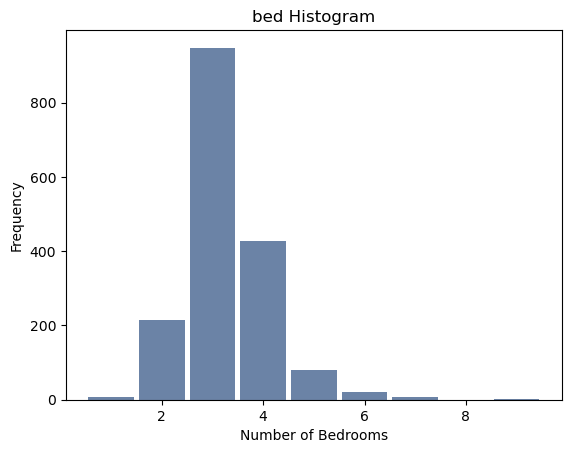

<Figure size 800x600 with 0 Axes>

In [139]:
# From Chapter 2, page 16
# Instantiate Hist object
hist_bed = thinkstats2.Hist(bedrooms)

# Plot using thinkplot
thinkplot.Hist(hist_bed)
thinkplot.Show(title = "bed Histogram", xlabel="Number of Bedrooms", ylabel="Frequency")

In [142]:
# Displays most of the descriptive characteristics, just need mode and spread
most_bed = bedrooms.describe()

# Calculating mode
mode_bed = bedrooms.mode()

# Calculating spread (variance)
var_bed = bedrooms.var()

In [143]:
print(most_bed)
print()
print("mode ", mode_bed)
print()
print("variance ", var_bed)

count    1707.000000
mean        3.268307
std         0.844649
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: bed, dtype: float64

mode  0    3.0
Name: bed, dtype: float64

variance  0.7134322433452762


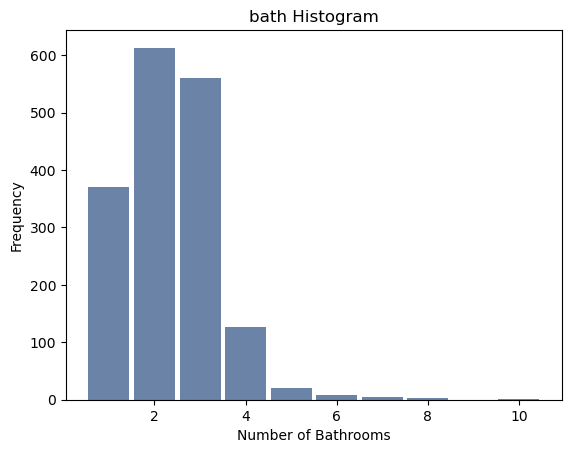

<Figure size 800x600 with 0 Axes>

In [144]:
# From Chapter 2, page 16
# Instantiate Hist object
hist_bath = thinkstats2.Hist(bathrooms)

# Plot using thinkplot
thinkplot.Hist(hist_bath)
thinkplot.Show(title = "bath Histogram", xlabel="Number of Bathrooms", ylabel="Frequency")

In [163]:
# Displays most of the descriptive characteristics, just need mode and spread
most_bath = bathrooms.describe()

# Calculating mode
mode_bath = bathrooms.mode()

# Calculating spread (variance)
var_bath = bathrooms.var()

In [164]:
print(most_bath)
print()
print("mode ", mode_bath)
print()
print("variance ", var_bath)

count    1707.000000
mean        2.340949
std         1.034450
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: bath, dtype: float64

mode  0    2.0
Name: bath, dtype: float64

variance  1.0700865548451863


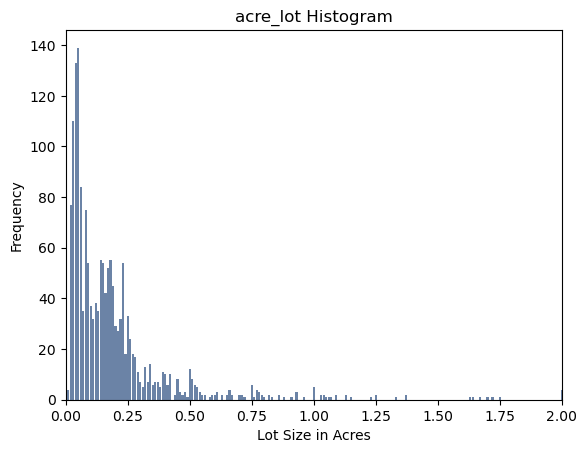

<Figure size 800x600 with 0 Axes>

In [165]:
# From Chapter 2, page 16
# Instantiate Hist object
hist_lot = thinkstats2.Hist(acres)

# Plot using thinkplot
plt.xlim(0, 2)
thinkplot.Hist(hist_lot)
thinkplot.Show(title = "acre_lot Histogram", xlabel="Lot Size in Acres", ylabel="Frequency")

In [166]:
# Displays most of the descriptive characteristics, just need mode and spread
most_lot = acres.describe()

# Calculating mode
mode_lot = acres.mode()

# Calculating spread (variance)
var_lot = acres.var()

In [167]:
print(most_lot)
print()
print("mode ", mode_lot)
print()
print("variance ", var_lot)

count    1707.000000
mean        2.106245
std        34.105441
min         0.010000
25%         0.050000
50%         0.140000
75%         0.230000
max       700.020000
Name: acre_lot, dtype: float64

mode  0    0.05
Name: acre_lot, dtype: float64

variance  1163.1810831357734


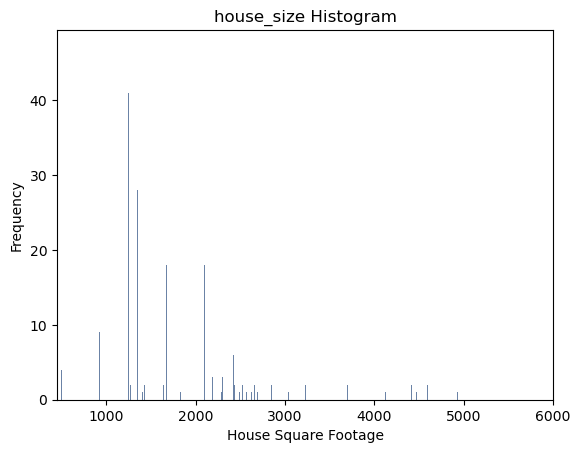

<Figure size 800x600 with 0 Axes>

In [168]:
# From Chapter 2, page 16
# Instantiate Hist object
hist_size = thinkstats2.Hist(footage)

# Plot using thinkplot
plt.xlim(450, 6000)
thinkplot.Hist(hist_size)
thinkplot.Show(title = "house_size Histogram", xlabel="House Square Footage", ylabel="Frequency")

In [169]:
# Displays most of the descriptive characteristics, just need mode and spread
most_size = footage.describe()

# Calculating mode
mode_size = footage.mode()

# Calculating spread (variance)
var_size = footage.var()

In [170]:
print(most_size)
print()
print("mode ", mode_size)
print()
print("variance ", var_size)

count     1707.000000
mean      2001.388401
std       1124.685447
min        500.000000
25%       1250.000000
50%       1750.000000
75%       2373.500000
max      11725.000000
Name: house_size, dtype: float64

mode  0    1200.0
Name: house_size, dtype: float64

variance  1264917.3537457983


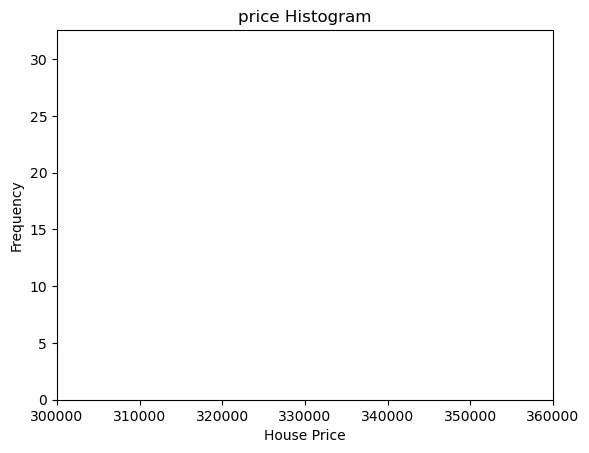

<Figure size 800x600 with 0 Axes>

In [171]:
# From Chapter 2, page 16
# Instantiate Hist object
hist_price = thinkstats2.Hist(price)

# Plot using thinkplot
#plt.axis([350000, 500000, 0, 9])
plt.xlim(300000, 360000)
thinkplot.Hist(hist_price)
thinkplot.Show(title = "price Histogram", xlabel="House Price", ylabel="Frequency")

In [172]:
# Displays most of the descriptive characteristics, just need mode and spread
most_price = price.describe()

# Calculating mode
mode_price = price.mode()

# Calculating spread (variance)
var_price = price.var()

In [173]:
print(most_price)
print()
print("mode ", mode_price)
print()
print("variance ", var_price)

count    1.707000e+03
mean     3.418941e+05
std      2.769240e+05
min      2.149700e+04
25%      1.950000e+05
50%      2.950000e+05
75%      4.199450e+05
max      3.950000e+06
Name: price, dtype: float64

mode  0    249900.0
Name: price, dtype: float64

variance  76686914286.47147


Note that some plots above had a limit set on the x-axis in order to visibly see the data. There are some outliers that affect the visibility of the plot.

## Probability Mass Function

The most common bedroom count is 3 and the most common bathroom count is 2. I will split the data into 2 groups. Group A will consist of houses that have *at least* 3 bedrooms and 2 bathrooms. Group B will consist of houses that have *less* than 2 bedrooms and 2 or less bathrooms.

I will use the thinkstats2.Pmf() function to create a PMF for each group using the **price** variable.

In [23]:
# Creating Group A
# First filter for houses with 3 or more bedrooms
firstA = housing.query("bed >= 3")
#print(len(groupA))

# Next filter for houses in 'firstA' with 2 or more bathrooms
# This is our first group
groupA = firstA.query("bath >= 2")

# Sub-group, this is for the houses that don't fit with the filter "bed >= 3 & bath >= 2" and would have been left out of the
# Group B filter, "bed != 3 & bath != 2"
subA = firstA.query("bath < 2")

# Creating Group B
# First filter for houses with 2 or less bedrooms
firstB = housing.query("bed < 3")

# Next combine with sub-group to finalize our second group
groupB = pd.concat([subA, firstB])

# The row counts were checked to be sure they added up to the original sum of 1707.

In [24]:
# Group A PMF
pmfA = thinkstats2.Pmf(groupA["price"], label = "Group A")

# Group B PMF
pmfB = thinkstats2.Pmf(groupB["price"], label = "Group B")

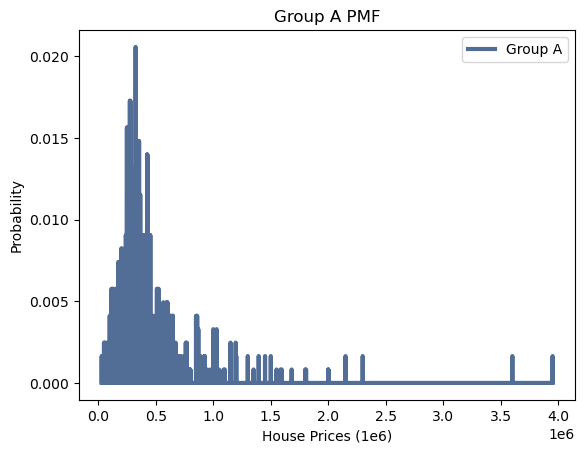

<Figure size 800x600 with 0 Axes>

In [25]:
# Plotting Group A's PMF
thinkplot.Pmf(pmfA)
thinkplot.Show(title = "Group A PMF", xlabel = "House Prices (1e6)", ylabel = "Probability")

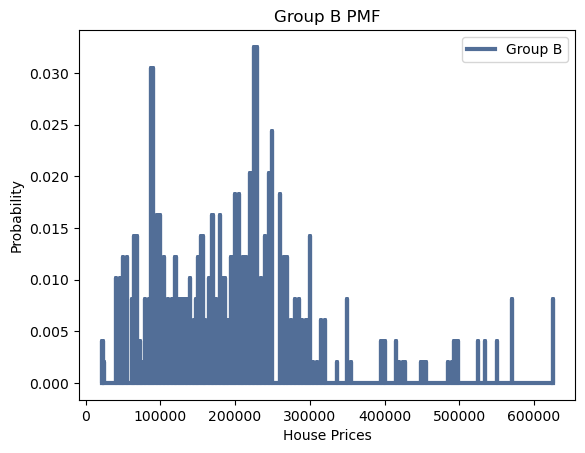

<Figure size 800x600 with 0 Axes>

In [26]:
# Plotting Group B's PMF
thinkplot.Pmf(pmfB)
thinkplot.Show(title = "Group B PMF", xlabel = "House Prices", ylabel = "Probability")

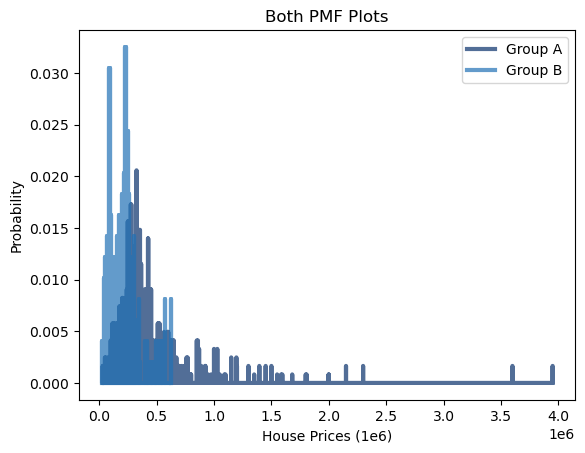

<Figure size 800x600 with 0 Axes>

In [27]:
# Both PMF plotted alongside one another
thinkplot.Pmfs([pmfA, pmfB])
thinkplot.Show(title = "Both PMF Plots", xlabel = "House Prices (1e6)", ylabel = "Probability")

## Cumulative Distribution Function

I created a CDF plot using the **bed** variable and from the plot I can easily see the mode, which is 3. About 70% of homes on sale in Delaware have 3 or less bedrooms. I can expect to pay a higher price because this must be the standard/demand. I'd like to purchase a home that has 3-4 bedrooms so I can expect to pay more for this feature. 

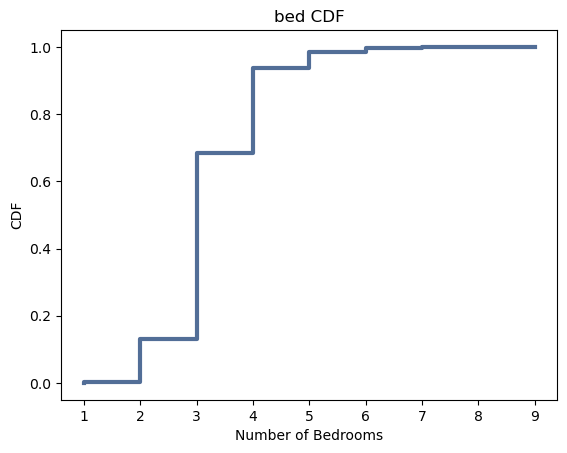

<Figure size 800x600 with 0 Axes>

In [174]:
# Creates CDF for the 'price' variable
cdf = thinkstats2.Cdf(bedrooms, label = "bed")

# Plotting
thinkplot.Cdf(cdf)
thinkplot.Show(title = "bed CDF", xlabel = "Number of Bedrooms", ylabel = "CDF")

## Analytical Distribution

I chose the normal distribution method, also called Gaussian.

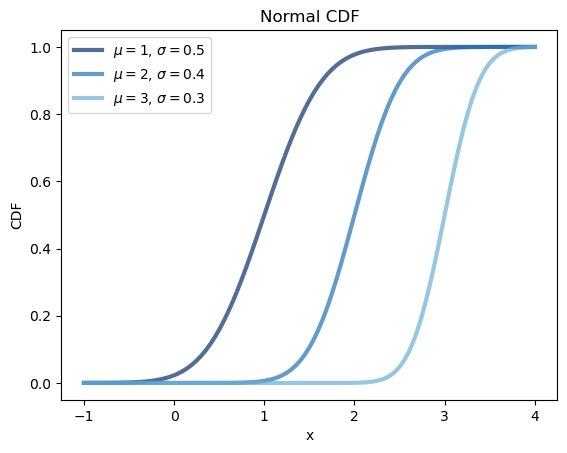

In [35]:
# "What the normal CDF looks like with a range of parameters."
# Provided by the author in chap05ex.ipynb
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r"$\mu=%g$, $\sigma=%g$" % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Normal CDF", xlabel="x", ylabel="CDF", loc="upper left")

Mean 0.2301912731619844
Var 0.19659828977441018
Sigma 0.44339405699040463


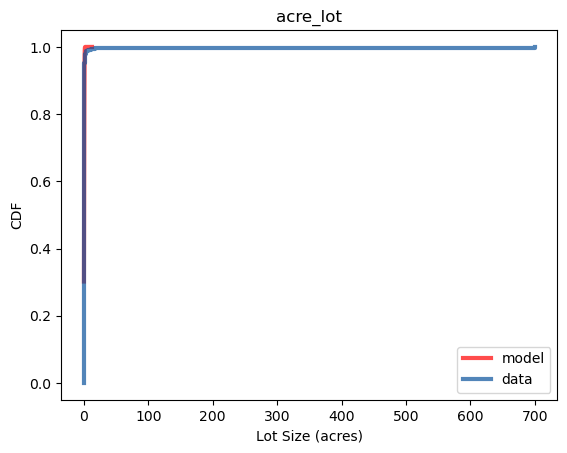

In [175]:
# Provided by the author in chap05ex.ipynb
# Estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(acres, p=0.01)
print("Mean", mu)
print("Var", var)

# Plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="red")

# Plot the data
cdf = thinkstats2.Cdf(acres, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="acre_lot", xlabel="Lot Size (acres)", ylabel="CDF")

# Added to get the legend out of the way
plt.legend(["model", "data"])

I decided to use the **acre_lot** variable and it is very evident the distribution is not normal. The model and data are aligned for a short segment of the plot. 

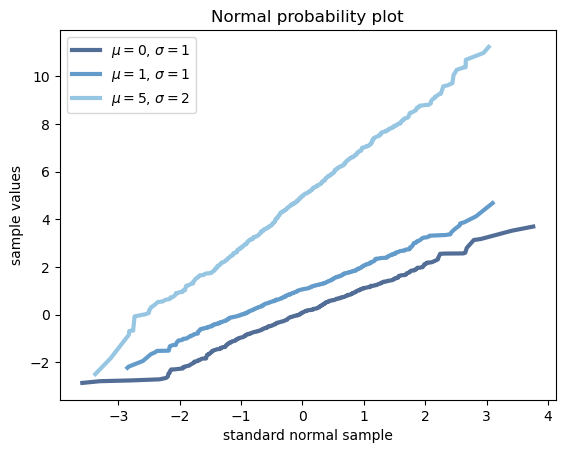

In [80]:
# "A normal probability plot is a visual test for normality. The following exmple shows that if the data are actually from a 
# normal distribution, the plot is approximately straight."
# Provided by the author in chap05ex.ipynb
n = 1000
thinkplot.PrePlot(3)

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = "$\mu=%d$, $\sigma=%d$" % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(
    title="Normal probability plot",
    xlabel="standard normal sample",
    ylabel="sample values",
)

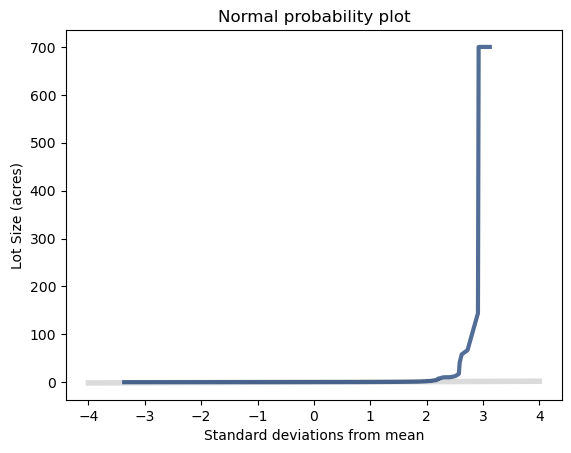

In [176]:
# Provided by the author in chap05ex.ipynb
mean, var = thinkstats2.TrimmedMeanVar(acres, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(acres)
thinkplot.Plot(xs, ys, label="acre_lot")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Lot Size (acres)",
)

Like before the data's plot is aligned with the model but not for its entirety.

## Scatter Plots

The following scatter plot analysis will be done using the **bed** and **price** variables.

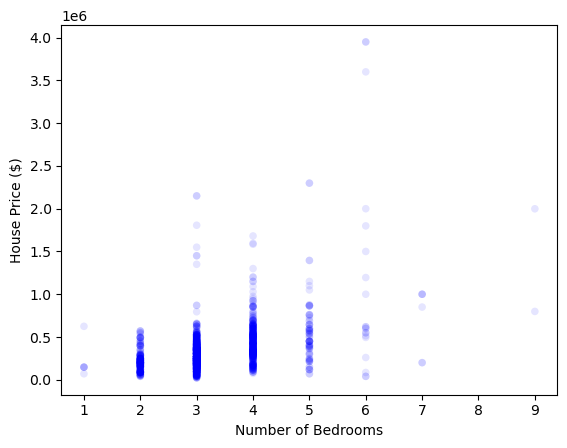

In [177]:
# Scatter plot when x=bed and y=price
thinkplot.Scatter(bedrooms, price, alpha=0.1)
thinkplot.Config(xlabel="Number of Bedrooms", ylabel="House Price ($)", legend=False)

In [178]:
# Computing Pearson's and Spearman's correlations.
print("Pearson's correlation:", thinkstats2.Corr(bedrooms, price))
print("Spearman's correlation:", thinkstats2.SpearmanCorr(bedrooms, price))

Pearson's correlation: 0.4433837613227662
Spearman's correlation: 0.4509060776912414


In [179]:
# Covariance
print("Covariance Matrix:")
print(np.cov(bedrooms, price))

Covariance Matrix:
[[7.13432243e-01 1.03709080e+05]
 [1.03709080e+05 7.66869143e+10]]


Pearon's correlation is positive so that means the correlation is positive. The value is almost 0.5 which means it's a stronger correlation. Spearmen's correlation value is very similar and thus represents a strong correlation between the two variables. The values of the matrix are positive which indicates that the variables tend to increase or decrease concurrently. 

This is a good sign. There is a correlation between bedroom count and a house's sale price. Since I'm in the market for a house with at least 3 bedrooms I can expect to pay a higher price. Which means I will have to save more and expect to put down a larger down payment.

The next scatter plot analysis will be done using the **house_size** and **price** variables.

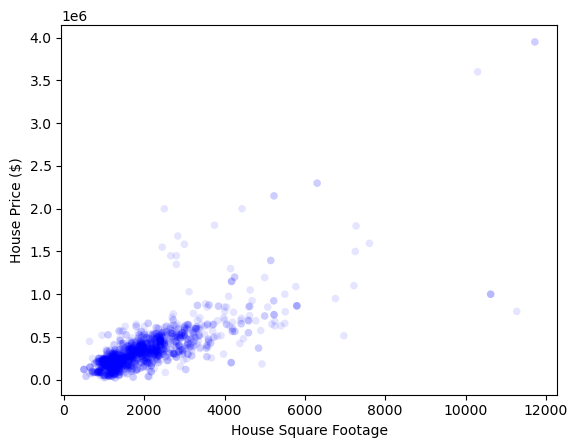

In [180]:
# Scatter plot when x=house_size and y=price
thinkplot.Scatter(footage, price, alpha=0.1)
thinkplot.Config(xlabel="House Square Footage", ylabel="House Price ($)", legend=False)

In [181]:
# Computing Pearson's and Spearman's correlations.
print("Pearson's correlation:", thinkstats2.Corr(footage, price))
print("Spearman's correlation:", thinkstats2.SpearmanCorr(footage, price))

Pearson's correlation: 0.7600489924787838
Spearman's correlation: 0.7668005116302256


In [182]:
# Covariance
print("Covariance Matrix:")
print(np.cov(footage, price))

Covariance Matrix:
[[1.26491735e+06 2.36719097e+08]
 [2.36719097e+08 7.66869143e+10]]


Like before, Pearon's correlation is positive so that means the correlation is positive. The value is greater than 0.5 which means it's a very strong correlation. Spearmen's correlation value is very similar and thus represents a very strong correlation between the two variables. The values of the matrix are also positive which indicates that the variables tend to increase or decrease concurrently. 

There is a very clear correlation between a house's square footage and a house's sale price. More bedrooms tends to mean bigger house. I should definitely start saving. 

## Hypothesis Testing

I decided to test the correlation between the **bed** and **price** variables. The null hypothesis is that there is no correlation between the variables.

In [133]:
# From chapter 9, page 107
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [150]:
data = bedrooms, price
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The output is 0 but it's not actually 0 it is a small value so it's rounded to 0.

In [152]:
ht.actual, ht.MaxTestStat()

(0.4433837613227662, 0.07679242955779617)

## Regression Analysis

I am using the variables **bed**, **bath**, **city**, **acre_lot**, and **house_size** as the factors that would influence the **price** variable. I included the **city** variable due to the fact that house prices vary by city. 

The null hypothesis is that these variables do *not* influence a house's market price.

In [158]:
model = smf.ols("price ~ bed + bath + city + acre_lot + house_size", data=housing)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:46:03   Log-Likelihood:                -22879.
No. Observations:                1707   AIC:                         4.579e+04
Df Residuals:                    1689   BIC:                         4.589e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.811e+05   2.75e+04     -6.579      0.000   -2.35e+05   -1.27e+05
city[T.Claymont]       1.135e+05   2.84e+04      3.988      0.000    5.77e+04    1.69e+05
city[T.Delaware City]  4.489e+04   3.59e+04      1.251      0.211   -2.55e+04    1.15e+05
city[T.Dover]          1.943e+05   6.92e+04      2.809      0.005    5.86e+04     3.3e+05
city[T.Elsmere]       -2.101e+05   1.62e+05     -1.301      0.193   -5.27e+05    1.07e+05
city[T.Greenville]     8.779e+05   5.56e+04     15.795      0.000    7.69e+05    9.87e+05
city[T.Hockessin]      1.131e+05   4.36e+04      2.592      0.010    2.75e+04    1.99e+05
city[T.Middletown]     1.318e+05   2.45e+04      5.381      0.000    8.38e+04     1.8e+05
city[T.New Castle]     1.014e+05   2.38e+04      4.263      0.000    5.48e+04    1.48e+05
city[T.Newark]         9.415e+04   2.54e+04      3.705      0.000    4.43e+04    1.44e+05
city[T.Odessa]         6.029e+04   9.58e+04      0.629      0.529   -1.28e+05    2.48e+05
city[T.Smyrna]         1.433e+05    3.4e+04      4.211      0.000    7.65e+04     2.1e+05
city[T.Townsend]         1.6e+05   3.77e+04      4.245      0.000     8.6e+04    2.34e+05
city[T.Wilmington]     1.029e+05   2.23e+04      4.606      0.000    5.91e+04    1.47e+05
bed                   -9415.1719   5846.733     -1.610      0.108   -2.09e+04    2052.431
bath                   7.642e+04   5703.926     13.397      0.000    6.52e+04    8.76e+04
acre_lot                368.0019    160.551      2.292      0.022      53.103     682.901
house_size              133.3513      5.577     23.909      0.000     122.412     144.291
==============================================================================
Omnibus:                     1469.676   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108804.949
Skew:                           3.600   Prob(JB):                         0.00
Kurtosis:                      41.444   Cond. No.                     9.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Most of the p-values are less than 0.05, which means it is statistically significant. In other words the null hypothesis can be rejected. Those variables do indeed have some influence in regards to the **price** variable. The only p-values that are greater than 0.05 are **bed** and the cities: *Delaware City*, *Elsmere*, and *Odessa*. These values are statistically significant, meaning the null hypothesis should not be rejected.

It seems like bedroom count doesn't always influence house price and I believe that the cities have a large range of prices so these areas don't really have much of an affect on the housing market.

# Summary

**200-500 summary the following: statistical/hypothesis question
outcome of your EDA
what do you feel was missed during the analysis?
were there any variables you felt could have helped in the analysis?
were there any assumptions made you felt were incorrect?
what challenges did you face, what did you not fully understand?**

I set out to answer the question "is there an actual correlation between house features and pricing?" I found a housing dataset and played out the scenario of moving to a different state and searching the market for a new home to live in. I do believe there is an actual correlation and this helps me plan accordingly. 

I do believe that I missed the fact that not every house on the market is in stellar condition. This can affect the price and can actually cause buyers to negotiate for lower prices. While this wouldn't affect someone like me who can plan ahead for the worse case scenario of paying full price. I think it is still something to consider when trying to figure out a home's value. I wouldn't pay top dollar for a run down house but rather for something that's move in ready. I think was a variable that could have and should have been in my analysis. It wasn't available but would have been helpful if it was. 

I think variables that contained data on other house features would have also been extremely useful. For example, data on half bathrooms, neighborhood safety ratings, HOA availability, furnishing (included or not), air conditioning, water heater, appliance energy (gas or electric), number of stories, basement, attic, garage space, and a description on the building's quality. I listed off plenty of variables and I'm sure I missed a few but these variables would have improved my analysis. 

As I mentioned before I assumed all houses were in perfect condition. In reality, a homebuyer can add value to a home and keep the basic features of the house the same and this would still increase the price. This means that on paper a 3 bedroom, 2 bathroom house can always cost x amount of dollars always, but a nicer house will cost more because its value is higher. It would be difficult to take this into account when estimating prices of homes that you can't see with your own eyes.

I had a difficult time graphing the histograms of the dataset so I decided to use just a single state within the dataset, Delaware. This helped because I could then actually see the plot after running the code. The dataset was so large and with so many outliers the graph was nonexistent. Even as it is now the graph is still very tiny but visible at the very least. I also had to set a limit on the x-axis so the plots are visible. There are outliers that are much farther away from the majority of the data and this create that 'empty' looking graph. Personally I would just drop them from the dataset since they're so far apart from the rest of the data. 

I don't fully understand analytical distribution. The book goes over it very briefly compared to other chapters where the author gives examples and actually shows the code that gives the figures in the text. That chapter just showed the graphs and skimmed through the different methods. I had to use his code from 'chap05ex.ipynb' to actually understand and see how the figures were created. I was not able to give much of an explanation at that part of my project due to this. 